In [150]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg.
# 2. постройте гистограмму
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат

In [151]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim, mean_squared_error

In [152]:
img = cv2.imread('sar_1_gray.jpg')

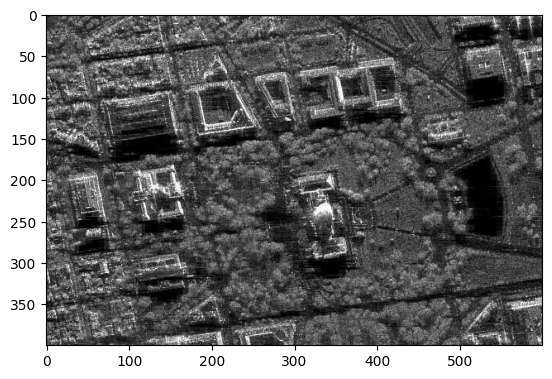

In [153]:
plt.imshow(img)

In [154]:
img[250,250]

array([74, 74, 74], dtype=uint8)

In [155]:
img_roi = img[100:200, 400:600]

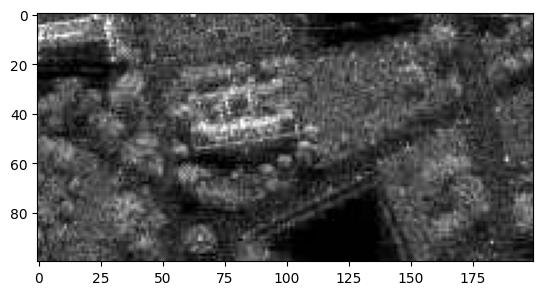

In [156]:
plt.imshow(img_roi)

## Гистограмма

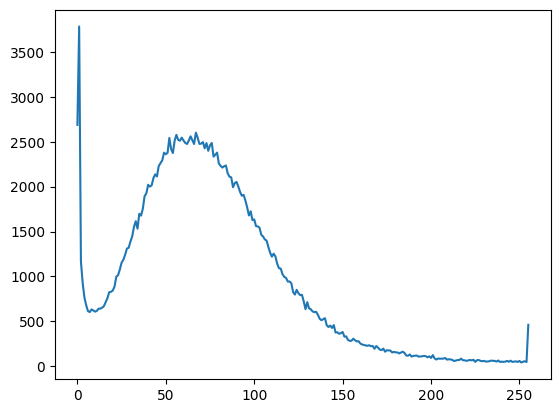

In [157]:
histSize = 256
histRange = (0, 256)
accumulate = False #вычисляем заново

b_hist = cv2.calcHist([img], [0], None, [histSize], histRange, accumulate=accumulate)
plt.plot(b_hist)

In [158]:
b_hist_cum = b_hist.cumsum() #кумулятивная сумма

Text(0, 0.5, 'Количество пикселей')

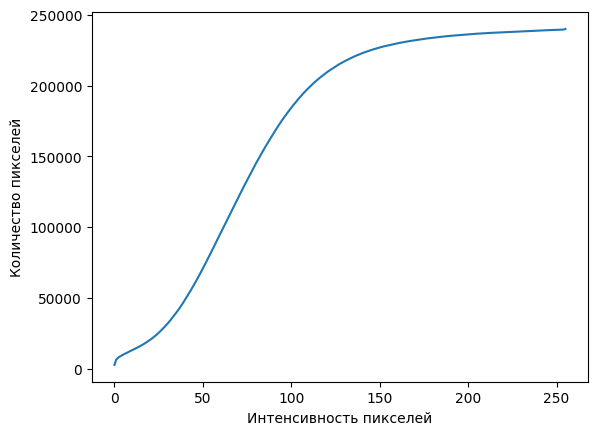

In [159]:
plt.plot(b_hist_cum)
plt.xlabel('Интенсивность пикселей')
plt.ylabel('Количество пикселей')

Гамма-коррекция

In [160]:
plt.figure(figsize=(22, 6))

<Figure size 2200x600 with 0 Axes>

<Figure size 2200x600 with 0 Axes>

In [161]:
gamma1 = 0.1

MSE: 21665.0396
SSIM: 0.3395


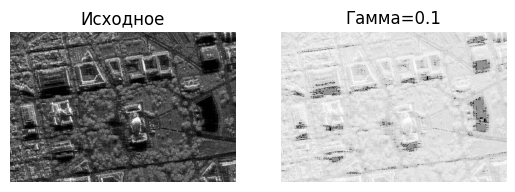

In [162]:
gamma_corrected = np.array(255 * (img / 255.0) ** gamma1, dtype='uint8')

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Исходное")
plt.axis('off')

mse_value = mean_squared_error(img, gamma_corrected) #средняяквадратичная ошибка

ssim_value, _ = ssim(img, gamma_corrected, full=True, win_size=3) #структурное сходство

print(f"MSE: {mse_value:.4f}")
print(f"SSIM: {ssim_value:.4f}")

plt.subplot(1,2,2)
plt.imshow(gamma_corrected, cmap='gray')
plt.title(f"Гамма={gamma1}")
plt.axis('off')

plt.show()

In [163]:
gamma1 = 2.5

MSE: 3556.5202
SSIM: 0.3092


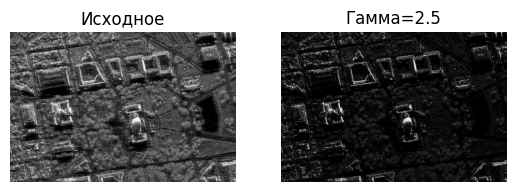

In [164]:
gamma_corrected = np.array(255 * (img / 255.0) ** gamma1, dtype='uint8')

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Исходное")
plt.axis('off')

mse_value1 = mean_squared_error(img, gamma_corrected)

ssim_value1, _ = ssim(img, gamma_corrected, full=True, win_size=3)

print(f"MSE: {mse_value1:.4f}")
print(f"SSIM: {ssim_value1:.4f}")

plt.subplot(1,2,2)
plt.imshow(gamma_corrected, cmap='gray')
plt.title(f"Гамма={gamma1}")
plt.axis('off')

plt.show()

Статистическая цветокоррекция

In [165]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

mean = img_gray.mean()
std = img_gray.std()

eq_gray = cv2.equalizeHist(img_gray)

mean_eq_gray = eq_gray.mean()
std_eq_gray  = eq_gray.std()

corrected_img = mean_eq_gray + (img_gray.astype(np.float32)- mean) * (std_eq_gray / std)
corrected_img = np.clip(corrected_img, 0, 255).astype(np.uint8)


Text(0.5, 1.0, 'После\nmean: 127.0, std: 74.3')

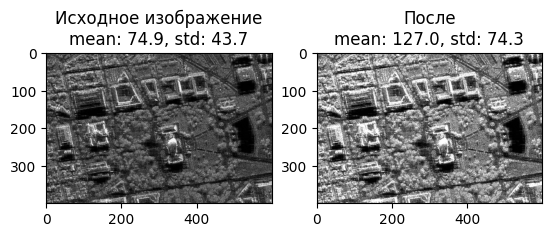

In [166]:
plt.subplot(1,2,1)
plt.imshow(img_gray, cmap='gray')
plt.title(f'Исходное изображение\nmean: {mean:.1f}, std: {std:.1f}')
plt.subplot(1,2,2)
plt.imshow(corrected_img, cmap="gray")
plt.title(f'После\nmean: {mean_eq_gray:.1f}, std: {std_eq_gray:.1f}')

Пороговая фильтрация

In [167]:
_,thresh1 = cv2.threshold(img_gray,60,255,cv2.THRESH_BINARY)
_,thresh2 = cv2.threshold(img_gray,150,255,cv2.THRESH_BINARY)
_,thresh3 = cv2.threshold(img_gray,254,255,cv2.THRESH_BINARY)

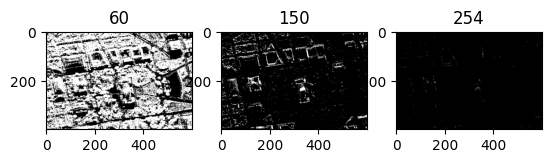

In [168]:
plt.subplot(1,3,1)
plt.title("60")
plt.imshow(thresh1, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(thresh1, cmap='gray')
plt.title("150")
plt.imshow(thresh2, cmap='gray')
plt.subplot(1,3,3)
plt.title("254")
plt.imshow(thresh3, cmap='gray')

plt.show()